## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнил(а): _(впишите свои фамилию и имя)_

### Общая информация

__Дата выдачи:__ 05.02.2020

__Дедлайн:__ 15.02.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib, а в качестве бонусного задания сможете реализовать алгоритм KNN.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

Для успешного выполнения этой части вам необходимо пройти все `assert`'ы.

In [1]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.42, вес контрольной - 0.14, вес самостоятельных - 0.14. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [2]:
def result_mark(weights: np.array, marks: np.array) -> int:
    res = (np.dot(weights, marks) + 0.5) * 2
    return res // 2 

In [3]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [4]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [5]:
def change_array(array: np.array, number: int) -> np.array:
    # your code here
    array[::3] = number
    return array

In [6]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [7]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (_**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**_).

In [8]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    res = np.arange(array1.size)
    sub = res[np.abs(array1 - array2)[res] <= precision]
    return sub
    

In [9]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [10]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [11]:
def block_matrix(block: np.array) -> np.array:
    return np.vstack((np.hstack((block, block)), np.hstack((block, block))))

In [12]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [13]:
def diag_prod(matrix: np.array) -> int:
    mat = matrix[np.arange(matrix.shape[0]), np.arange(matrix.shape[1])]
    return mat[mat != 0].prod()

In [14]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [15]:
def normalize(matrix: np.array) -> np.array:
    res = matrix.std(axis=0) 
    res[res == 0] = 1
    return (matrix - matrix.mean(axis=0)) / res

In [16]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [17]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [18]:
def antiderivative(coefs: np.array) -> np.array:
    return np.polyint(coefs)

In [19]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [20]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [21]:
def make_symmetric(matrix: np.array) -> np.array:
    res = (matrix + matrix.T)
    res[np.arange(res.shape[0]), np.arange(res.shape[1])] = res[np.arange(res.shape[0]), np.arange(res.shape[1])] / 2
    return res

In [22]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [23]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [24]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    ar = np.array([np.arange(a, b + 1), np.arange(a, b + 1)])
    return np.repeat(ar, [0,m], axis=0)

In [25]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [26]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [27]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    return np.dot(vec1, vec2) / np.sqrt(np.sum(vec1 ** 2)) / np.sqrt(np.sum(vec2 ** 2))

In [28]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [29]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2. Pandas и Matplotlib

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [31]:
data = pd.read_csv('train.csv', delimiter=',')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

### Признаки:
* PassengerId - другое (индексация)
* Survived - бинарный
* Pclass - порядковый
* Name - категориальный
* Sex - категориальный
* Age - вещественный
* SibSp - вещественный
* Parch - вещественный
* Ticket - категориальный
* Fare - вещественный
* Cabin - категориальный
* Embarked - категориальный

___


### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [33]:
survived = data[data['Survived'] == 1]
survivedMen = survived[survived['Sex'] == 'male']
survivedWomen = survived[survived['Sex'] == 'female']
print(f'Доля выживших {survived.size / data.size}')
print(f'Доля мужчин: {survivedMen.size / survived.size}, женщин: {survivedWomen.size / survived.size}')

Доля выживших 0.3838383838383838
Доля мужчин: 0.31871345029239767, женщин: 0.6812865497076024


### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [34]:
firstClass = data[data['Pclass'] == 1]
secondClass = data[data['Pclass'] == 2]
thirdClass = data[data['Pclass'] == 3]
male = thirdClass[thirdClass['Sex'] == 'male']
female = thirdClass[thirdClass['Sex'] == 'female']
print(f'Пассажиров первого класса: {firstClass.size}')
print(f'Пассажиров второго класса: {secondClass.size}')
print(f'Пассажиров третьего класса: {thirdClass.size}')
print(f'Мужчин третьего класса: {male.size}')
print(f'Женщин третьего класса: {female.size}')

Пассажиров первого класса: 2592
Пассажиров второго класса: 2208
Пассажиров третьего класса: 5892
Мужчин третьего класса: 4164
Женщин третьего класса: 1728


### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

Максимум расходов 512.3292
Среднее расходов 32.204207968574636
Минимум расходов 0.0
Максимум расходов (Саутгемптон) 263.0
Среднее расходов (Саутгемптон) 27.079811801242233
Минимум расходов (Саутгемптон) 0.0


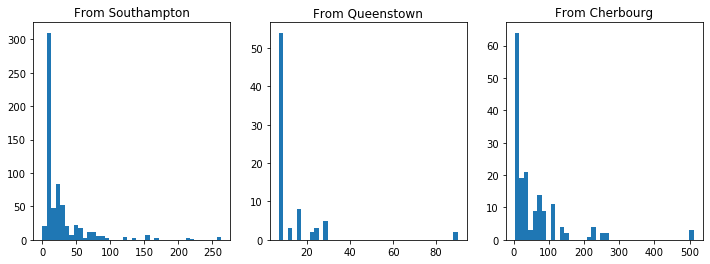

In [35]:
mn = data['Fare'].mean()
mx = data['Fare'].max()
mi = data['Fare'].min()
print(f'Максимум расходов {mx}')
print(f'Среднее расходов {mn}')
print(f'Минимум расходов {mi}')

southampton = data[data['Embarked'] == 'S']
mn = southampton['Fare'].mean()
mx = southampton['Fare'].max()
mi = southampton['Fare'].min()
print(f'Максимум расходов (Саутгемптон) {mx}')
print(f'Среднее расходов (Саутгемптон) {mn}')
print(f'Минимум расходов (Саутгемптон) {mi}')

plt.figure(figsize=[12, 4])
plt.subplot(1,3,1)
plt.hist(data[data['Embarked'] == 'S']['Fare'], bins=40)
plt.title('From Southampton')

plt.subplot(1,3,2)
plt.hist(data[data['Embarked'] == 'Q']['Fare'], bins=40)
plt.title('From Queenstown')

plt.subplot(1,3,3)
plt.hist(data[data['Embarked'] == 'C']['Fare'], bins=40)
plt.title('From Cherbourg')

plt.show()

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [36]:
# В наших данных есть признаки, не несущие полезной информации. 
# Следующие признаки не повлияют на поведение модели (их можно удалить):
# Name (Имя), Ticket (Номер билета); признак Cabin в теории полезно нагружает модель,
# но на практике его представление неудобно и непонятно
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [37]:
null_data = data.isnull().any()
print('Поля с пропусками: ', end='')
print(*null_data[null_data].index)

# Количество пустых значений по столбцам
nan_data = data[null_data[null_data].index].isnull()
print('Age ', end='')
print(nan_data.iloc[:,0][nan_data.iloc[:,0]].size)
print('Embarked ', end='')
print(nan_data.iloc[:,1][nan_data.iloc[:,1]].size)

Поля с пропусками: Age Embarked
Age 177
Embarked 2


### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [38]:
data.loc[data.Age.isna(), 'Age'] = data['Age'].mean()
data.loc[data.Embarked.isna(), 'Embarked'] = data['Embarked'].value_counts()[data['Embarked'].value_counts().max() == data['Embarked'].value_counts()].index[0]
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

Корреляционная матрица возраста и стоимости билета: 
           Age      Fare
Age   1.000000  0.091566
Fare  0.091566  1.000000


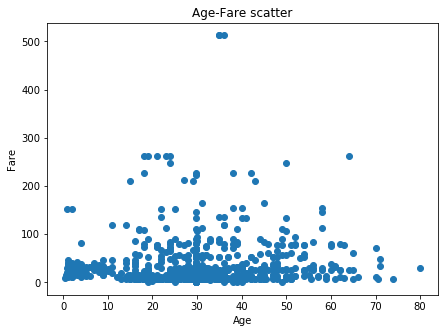

In [39]:
df = pd.DataFrame({'Age': data.Age, 'Fare': data.Fare})
print('Корреляционная матрица возраста и стоимости билета: ')
print(df.corr())

plt.figure(figsize=(7,5))
plt.scatter(data.Age.values, data.Fare.values)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age-Fare scatter')
plt.show()

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [40]:
df = pd.DataFrame({'Survived': data.Survived, 'Fare': data.Fare})
print('Корреляционная матрица выживаемости и стоимости билета: ')
print(df.corr())
print()

df = pd.DataFrame({'Survived': data.Survived, 'Pclass': data.Pclass})
print('Корреляционная матрица выживаемости и пассажирского класса: ')
print(df.corr())

Корреляционная матрица выживаемости и стоимости билета: 
          Survived      Fare
Survived  1.000000  0.257307
Fare      0.257307  1.000000

Корреляционная матрица выживаемости и пассажирского класса: 
          Survived    Pclass
Survived  1.000000 -0.338481
Pclass   -0.338481  1.000000


### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [41]:
data['Relatives'] = data['SibSp'] + data['Parch'] + 1
data.head()
# Так как вещественных данных мало и мне не хватает опыта, придумать какой-либо информативный признак я не смог :(
# Как вариант - можно добавить статистические данные - средние значения, дисперсию и т.д. для вещественых признаков

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives
0,1,0,3,male,22.0,1,0,7.2500,S,2
1,2,1,1,female,38.0,1,0,71.2833,C,2
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,2
4,5,0,3,male,35.0,0,0,8.0500,S,1


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

1 класс: min=0.0, max=512.3292, mean=84.1546875
2 класс: min=0.0, max=73.5, mean=20.662183152173913
3 класс: min=0.0, max=69.55, mean=13.675550101832993


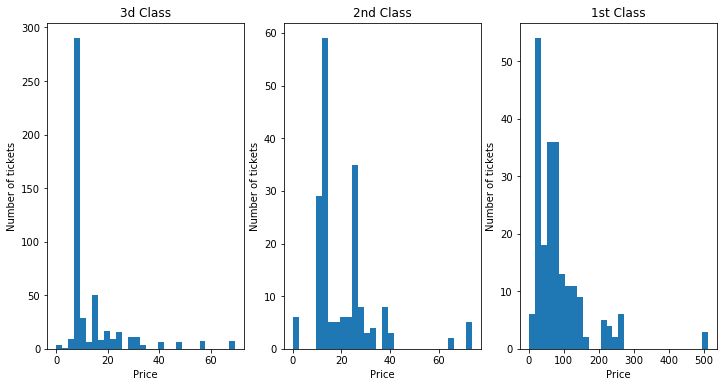

In [42]:
# Расчитаем наименьшую, среднюю и наибольшую стоимость билетов для каждого класса и рассмотрим их распределение наглядно
# с помощью Scatter Plot
c1min = data.loc[data['Pclass'] == 1, 'Fare'].min()
c1mean = data.loc[data['Pclass'] == 1, 'Fare'].mean()
c1max = data.loc[data['Pclass'] == 1, 'Fare'].max()

c2min = data.loc[data['Pclass'] == 2, 'Fare'].min()
c2mean = data.loc[data['Pclass'] == 2, 'Fare'].mean()
c2max = data.loc[data['Pclass'] == 2, 'Fare'].max()

c3min = data.loc[data['Pclass'] == 3, 'Fare'].min()
c3mean = data.loc[data['Pclass'] == 3, 'Fare'].mean()
c3max = data.loc[data['Pclass'] == 3, 'Fare'].max()

print(f'1 класс: min={c1min}, max={c1max}, mean={c1mean}')
print(f'2 класс: min={c2min}, max={c2max}, mean={c2mean}')
print(f'3 класс: min={c3min}, max={c3max}, mean={c3mean}')

plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
plt.hist(data.loc[data['Pclass'] == 3, 'Fare'], bins=30)
plt.xlabel('Price')
plt.ylabel('Number of tickets')
plt.title('3d Class')

plt.subplot(1, 3, 2)
plt.hist(data.loc[data['Pclass'] == 2, 'Fare'], bins=30)
plt.xlabel('Price')
plt.ylabel('Number of tickets')
plt.title('2nd Class')

plt.subplot(1, 3, 3)
plt.hist(data.loc[data['Pclass'] == 1, 'Fare'], bins=30)
plt.xlabel('Price')
plt.ylabel('Number of tickets')
plt.title('1st Class')

plt.show()

### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

In [43]:
print('Before normalizing')

data.hist()

print('After normalizing')

# Работает только если все данные - вещественные!!!!!!!!!!!!!!!!!!!!

normalized_data = (data - data.mean()) / data.std() 
# (можно сделать по dtype, но я уже не успеваю)
normalized_data.hist();

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [44]:
data['IsMale'] = 0
data['IsFemale'] = 0
data.loc[data.Sex == 'male','IsMale'] = 1
data.loc[data.Sex == 'female','IsFemale'] = 1

data['IsFromS'] = 0
data['IsFromC'] = 0
data['IsFromQ'] = 0
data.loc[data.Embarked == 'S', 'IsFromS'] = 1
data.loc[data.Embarked == 'C', 'IsFromC'] = 1
data.loc[data.Embarked == 'Q', 'IsFromQ'] = 1

data = data.drop(['Sex', 'Embarked'], axis=1)
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Relatives,IsMale,IsFemale,IsFromS,IsFromC,IsFromQ
0,1,0,3,22.000000,1,0,7.2500,2,1,0,1,0,0
1,2,1,1,38.000000,1,0,71.2833,2,0,1,0,1,0
2,3,1,3,26.000000,0,0,7.9250,1,0,1,1,0,0
3,4,1,1,35.000000,1,0,53.1000,2,0,1,1,0,0
4,5,0,3,35.000000,0,0,8.0500,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1,1,0,1,0,0
887,888,1,1,19.000000,0,0,30.0000,1,0,1,1,0,0
888,889,0,3,29.699118,1,2,23.4500,4,0,1,1,0,0
889,890,1,1,26.000000,0,0,30.0000,1,1,0,0,1,0


# 3 KNN своими руками (Бонусное задание: 4 балла)

### 25
В этом задании вам предстоить реализовать метод KNN для задачи классификации. Перед вами интерфейс класса, который вам предстоить реализовать. От вас требуется реализовать методы:
* `__init__(self, n_neighbors)`
* `fit(self, X, y)`
* `predict(self, X)`
* `predict_proba(self, X)`

Все ближайшие соседи должны иметь одинаковые веса при построении предсказания. В качестве метрики используйте евклидово расстояние.

Для поиска ближайших соседей можно воспользоваться готовыми структурами данных из подмодуля `sklearn.neighors`, например `KDTree`. Структуры данных из этого подмодуля принимают на вход массив точек, а потом позволяют делать запросы и быстро находить ближайших соседей.

Для проверки работы вашей реализации примените алгоритм ближайших соседей на датасете из пункта 24.
Какие метрики качества у вас получаются? Сравните свои результаты с результатами KNN из библиотеки sklearn.

In [45]:
from sklearn.base import BaseEstimator
from sklearn.neighbors import KDTree
import numpy as np

class MyNeighborsClassifier(BaseEstimator):
    def __init__(self, n_neighbors):
        super().__init__()
        self.k = n_neighbors
    
    def fit(self, X, y):
        self.tree = KDTree(X, leaf_size=40, metric='euclidean')
        self.y = y
    
    def predict(self, X):
        ind = self.tree.query(X, k=self.k, return_distance=False)
        return np.unique(self.y[ind], return_counts=True)[0, 0]
    
    def predict_proba(self, X):
        ind = self.tree.query(X, k=self.k, return_distance=False)
        return np.unique(self.y[ind], return_counts=True)[0, 0]